### Voting Ensemble

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [6]:
df=pd.DataFrame(iris.data)

In [7]:
df.columns=iris.feature_names

In [8]:
df['target']=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

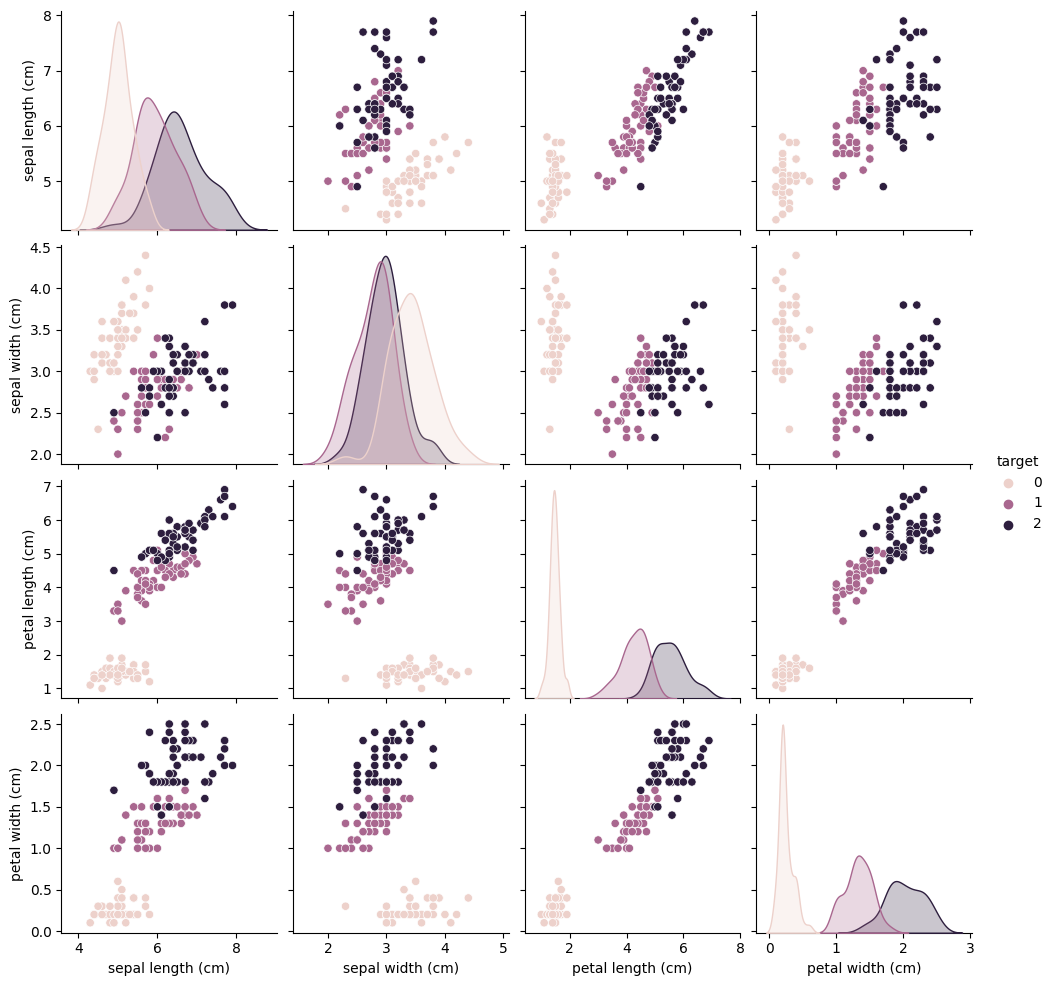

In [33]:
import seaborn as sns
sns.pairplot(df,hue='target')

### Voting Classifier

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [40]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [41]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [53]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.71
knn 0.76


In [59]:
from sklearn.ensemble import VotingClassifier

In [65]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


In [67]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


In [68]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.77
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.75
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.75
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.78
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.76
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.79
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.76
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.75
for i=3,j=3,k=2 0.76
for i=3,j=3,k=3 0.77


### Voting Regressor

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [10]:
x,y=load_diabetes(return_X_y=True)

In [11]:
x.shape,y.shape

((442, 10), (442,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

In [16]:
from sklearn.model_selection import cross_val_score

In [13]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
sv=SVR()

In [15]:
estimators=[('lr',lr),('dt',dt),('sv',sv)]

In [17]:
for estimator in estimators:
    scores = cross_val_score(estimator[1],x,y,scoring='r2',cv=10)
    print(estimator[0],np.round(np.mean(scores),2))
    

lr 0.46
dt -0.27
sv 0.15


In [24]:
vr=VotingRegressor(estimators)
scores = cross_val_score(vr,x,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.35


### Bagging 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [4]:
df=pd.DataFrame(iris.data)

In [7]:
df.columns=iris.feature_names

In [8]:
df['target']=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df = df[df['target'] != 0][['sepal length (cm)','petal length (cm)','target']]

In [17]:
df.head()

,sepal length (cm),petal length (cm),target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

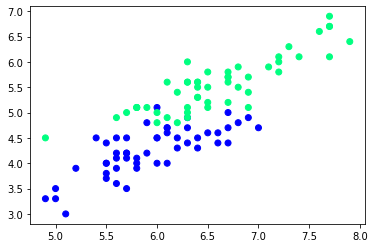

In [21]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')

In [23]:
df=df.sample(100)

In [26]:
d1=df.iloc[:60,:].sample(10)
d1

,sepal length (cm),petal length (cm),target
76,6.8,4.8,1
96,5.7,4.2,1
74,6.4,4.3,1
128,6.4,5.6,2
78,6.0,4.5,1
141,6.9,5.1,2
52,6.9,4.9,1
79,5.7,3.5,1
92,5.8,4.0,1
69,5.6,3.9,1


In [27]:
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [31]:
# replacement
d1.sample(8,replace=True)

,sepal length (cm),petal length (cm),target
76,6.8,4.8,1
78,6.0,4.5,1
74,6.4,4.3,1
74,6.4,4.3,1
128,6.4,5.6,2
141,6.9,5.1,2
96,5.7,4.2,1
141,6.9,5.1,2


In [32]:
# without replacement
d1.sample(8,replace=False)

,sepal length (cm),petal length (cm),target
141,6.9,5.1,2
74,6.4,4.3,1
78,6.0,4.5,1
128,6.4,5.6,2
76,6.8,4.8,1
52,6.9,4.9,1
79,5.7,3.5,1
96,5.7,4.2,1


In [38]:
#column sampling 
d1.sample(1,axis=1)

,sepal length (cm)
76,6.8
96,5.7
74,6.4
128,6.4
78,6.0
141,6.9
52,6.9
79,5.7
92,5.8
69,5.6


### Bagging Classifier

In [2]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [7]:
X,y=make_classification(n_samples=300, n_features=5)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))
     

Decision Tree accuracy 0.8833333333333333


In [11]:
bag=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10,max_samples=0.5,bootstrap=True,verbose=1)

In [12]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  verbose=1)

In [13]:
y_pred = bag.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.9333333333333333

### Random Forest

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
rf=RandomForestClassifier()

In [7]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
y_pred=rf.predict(X_test)

In [9]:
accuracy_score(y_test,y_pred)

0.819672131147541

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(rf,X,y,verbose=1,cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.76666667, 0.76666667, 0.83333333, 0.7       , 0.83333333])

In [12]:
rf.feature_importances_

array([0.08953486, 0.04131525, 0.10090121, 0.07066153, 0.08326703,
       0.01056774, 0.0211731 , 0.11596711, 0.07845706, 0.12759087,
       0.0438701 , 0.12989737, 0.08679677])

### Decision Tree 

In [17]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt=DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=dt.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [30]:
from sklearn.model_selection import cross_val_score

In [46]:
value=cross_val_score(dt,X,y,cv=10)
value

array([0.80645161, 0.83870968, 0.87096774, 0.8       , 0.8       ,
       0.7       , 0.7       , 0.73333333, 0.66666667, 0.7       ])

In [47]:
np.mean(value)

0.7616129032258064

### AdaBoost Algorithm

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.DataFrame()

In [5]:
df['x']=[1,2,3,4,5]
df['y']=[5,3,6,8,1]
df['label']=[1,1,0,1,0]
df

,x,y,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


In [6]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

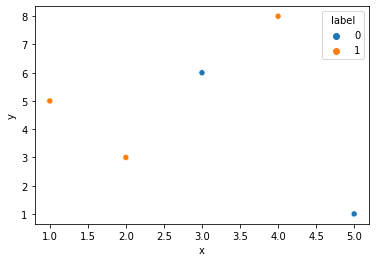

In [10]:
import seaborn as sns
sns.scatterplot(df['x'],df['y'],hue=df['label'])

In [12]:
df['weight']=(1/df.shape[0])
df

,x,y,label,weight
0,1,5,1,0.2
1,2,3,1,0.2
2,3,6,0,0.2
3,4,8,1,0.2
4,5,1,0,0.2


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier(max_depth=1)

In [33]:
X=df.iloc[:,:2].values
Y=df.iloc[:,2:3].values

In [34]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

In [35]:
df['predict']=dt.predict(X)
df

,x,y,label,weight,predict
0,1,5,1,0.2,1
1,2,3,1,0.2,1
2,3,6,0,0.2,0
3,4,8,1,0.2,0
4,5,1,0,0.2,0


[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

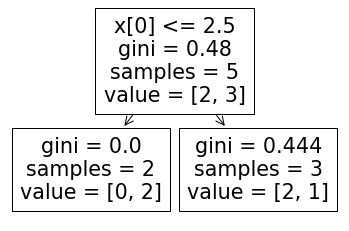

In [36]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [46]:
y=np.array(Y).reshape(5)

<AxesSubplot:>

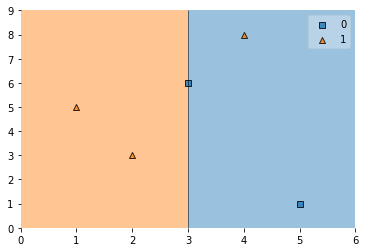

In [47]:
plot_decision_regions(X,y,clf=dt)

In [58]:
def alpha(error):
    return 0.5*(np.log((1-error)/error))

In [59]:
alpha1=alpha(0.2) 


In [61]:
alpha1

0.6931471805599453

In [81]:
def update_row_weights(row,alpha=0.69):
    
      if row['label'] == row['predict']:
        return row['weight'] * np.exp(-alpha)
      else:
        return row['weight'] * np.exp(alpha)

In [86]:
df['update_weight']=df.apply(update_row_weights,axis=1)
df

,x,y,label,weight,predict,update_weight
0,1,5,1,0.2,1,0.100315
1,2,3,1,0.2,1,0.100315
2,3,6,0,0.2,0,0.100315
3,4,8,1,0.2,0,0.398743
4,5,1,0,0.2,0,0.100315


In [89]:
df['normalize']=df['update_weight']/df['update_weight'].sum()
df

,x,y,label,weight,predict,update_weight,normalize
0,1,5,1,0.2,1,0.100315,0.125393
1,2,3,1,0.2,1,0.100315,0.125393
2,3,6,0,0.2,0,0.100315,0.125393
3,4,8,1,0.2,0,0.398743,0.498426
4,5,1,0,0.2,0,0.100315,0.125393


In [90]:
df['normalize'].sum()

1.0

In [97]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalize']
df['cumsum_upper'] = np.cumsum(df['normalize'])
df

,x,y,label,weight,predict,update_weight,normalize,cumsum_upper,cumsum_lower
0,1,5,1,0.2,1,0.100315,0.125393,0.125393,0.000000
1,2,3,1,0.2,1,0.100315,0.125393,0.250787,0.125393
2,3,6,0,0.2,0,0.100315,0.125393,0.376180,0.250787
3,4,8,1,0.2,0,0.398743,0.498426,0.874607,0.376180
4,5,1,0,0.2,0,0.100315,0.125393,1.000000,0.874607


In [103]:
def create_new_dataset(df):
    

    indices = []

    for i in range(df.shape[0]):
        
        a = np.random.random()
        for index,row in df.iterrows():
            
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                
                indices.append(index)
    return indices

In [104]:
index_values = create_new_dataset(df)
index_values

[2, 3, 3, 4, 3]

In [108]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,x,y,label,weight
2,3,6,0,0.2
3,4,8,1,0.2
3,4,8,1,0.2
4,5,1,0,0.2
3,4,8,1,0.2


### continue above step in repetation form to get boosting

In [109]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [110]:
X1 = second_df.iloc[:,0:2].values
y1= second_df.iloc[:,2].values

In [111]:
dt2.fit(X1,y1)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

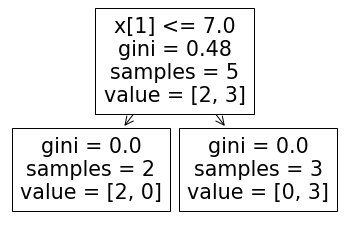

In [112]:
plot_tree(dt2)

<AxesSubplot:>

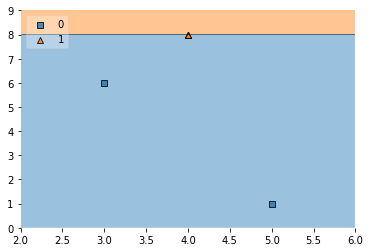

In [113]:
plot_decision_regions(X1, y1, clf=dt2, legend=2)

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
ab=AdaBoostClassifier()
ab.fit(X,Y)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

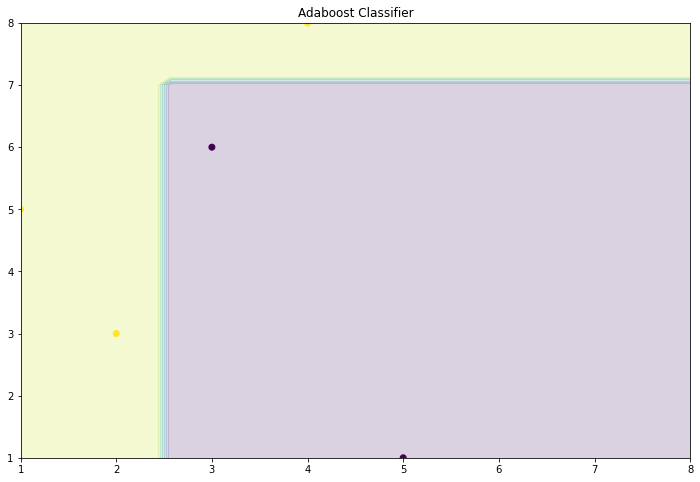

In [131]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max())
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(ab)

In [121]:
import matplotlib.pyplot as plt

In [132]:
ab.predict(X)

array([1, 1, 0, 1, 0], dtype=int64)

### Gradient Boosting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [4]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

In [5]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


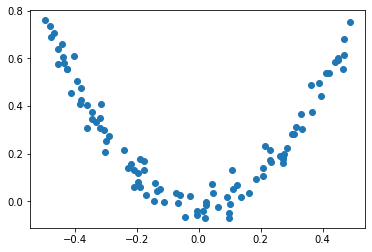

In [12]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [14]:
df['pred1']=df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [15]:
df['residual1']=df['y']-df['pred1']
df

,X,y,pred1,residual1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


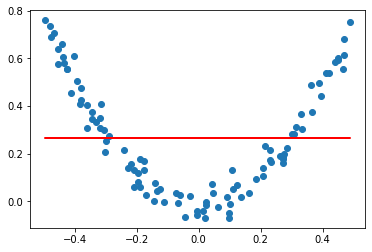

In [16]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dt=DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
dt.fit(df['X'].values.reshape(100,1),df['residual1'])

DecisionTreeRegressor(max_leaf_nodes=8)

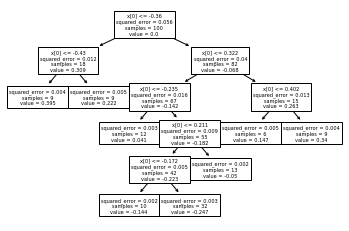

In [26]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

In [30]:
df['pred2']=0.2654+dt.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,residual1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018261
1,0.450714,0.594480,0.265458,0.329021,0.605826
2,0.231994,0.166052,0.265458,-0.099407,0.215726
3,0.098658,-0.070178,0.265458,-0.335636,0.018261
4,-0.343981,0.343986,0.265458,0.078528,0.305906
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018261
96,0.022733,-0.002305,0.265458,-0.267763,0.018261
97,-0.072459,0.032809,0.265458,-0.232650,0.018261
98,-0.474581,0.689516,0.265458,0.424057,0.660854


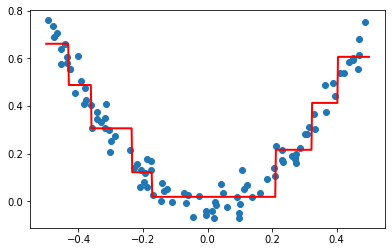

In [57]:
X_test = np.linspace(-0.5, 0.5, 500)
y_pred = 0.265458 + dt.predict(X_test.reshape(500, 1))
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
     

In [45]:
df['residual2'] = df['y'] - df['pred2']
df

,X,y,pred1,residual1,pred2,residual2
0,-0.125460,0.051573,0.265458,-0.213885,0.018261,0.033312
1,0.450714,0.594480,0.265458,0.329021,0.605826,-0.011346
2,0.231994,0.166052,0.265458,-0.099407,0.215726,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,0.018261,-0.088439
4,-0.343981,0.343986,0.265458,0.078528,0.305906,0.038080
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018261,-0.058936
96,0.022733,-0.002305,0.265458,-0.267763,0.018261,-0.020566
97,-0.072459,0.032809,0.265458,-0.232650,0.018261,0.014547
98,-0.474581,0.689516,0.265458,0.424057,0.660854,0.028662


In [46]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [48]:
tree2.fit(df['X'].values.reshape(100,1),df['residual2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [53]:
y_pred2 = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [dt,tree2])

Text(0.5, 1.0, 'X vs y')

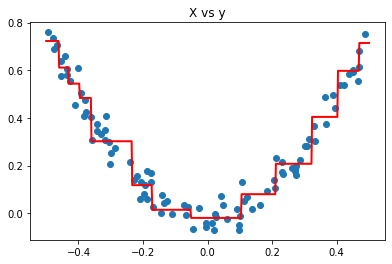

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred2, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
gb=GradientBoostingRegressor()

In [8]:
gb.fit(df['X'].values.reshape(100,1),df['y'].values)

GradientBoostingRegressor()

In [9]:
X_test = np.linspace(-0.5, 0.5, 500)

In [15]:
y_pred=gb.predict(X_test.reshape(-1, 1))

In [16]:
import matplotlib.pyplot as plt

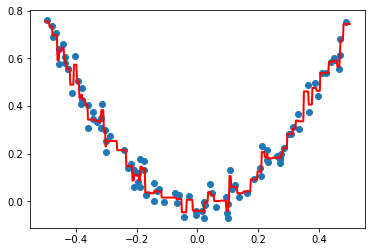

In [17]:
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

### Stacking Ensemble

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier

In [27]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X = df.drop(columns=['target'])
y = df['target']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [32]:
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [33]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [34]:
y_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8688524590163934